**IMDB-Review Sentiment Classification** 

Metadata:

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. 

Objective:

Predicting the number of positive and negative reviews using deep learning algorithms.

In [ ]:
#Importing libraries

#For numerical analysis and computation of data
import pandas as pd
import numpy as np

#For visualization of data
import seaborn as sns
import matplotlib.pyplot as plt

## Loading datasets and preprocessing

In [ ]:
#Importing the datasets
train=pd.read_csv("../input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv")
valid=pd.read_csv("../input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv")
test=pd.read_csv("../input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv")

In [ ]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
#Shapes of the dataset
print(train.shape)
print(test.shape)
print(valid.shape)

(40000, 2)
(5000, 2)
(5000, 2)


<AxesSubplot:xlabel='label', ylabel='count'>

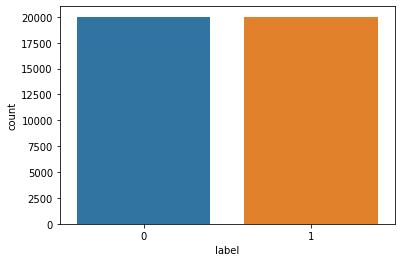

In [ ]:
#Checking for the class imbalance in train dataset
sns.countplot(x = train.label)

<AxesSubplot:xlabel='label', ylabel='count'>

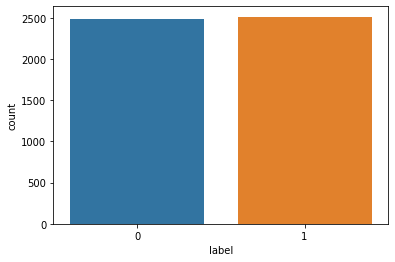

In [ ]:
#Checking for the class imbalance in test dataset
sns.countplot(x = valid.label)

Inference:
In the given dataset(both train and validation),data is not unbalanced.

Model 1:
1. Perform required text pre-processing – lowering text, removing URLs, punctuation , stop 
words and correct spelling .
2. Perform tokenization and lemmatization on cleaned data .
3. Visualize the most frequent words and bigrams
4. Visualize the practical words that represent positive and negative sentiment in the dataset.
5. Create an embedding layer and build a 15 layer LSTM and a 20 layer BidRNN for 
predicting the sentiment.
6. Build your own test dataset with 10 movie reviews and tabulate accuracy.

In [ ]:
#using NLTK for sentimental analysis of data
import re
from nltk import word_tokenize  #for tokenization
from nltk.corpus import stopwords #for filtering out stopwords

In [ ]:
#creating a function for preprocessing of the dataset
def preprocess_data(data = None, stopwords = None):
    #converting the text to lowercase
    def lower_text(data = None):
        data['text'] = data['text'].apply(lambda x : str(x).lower())
        return data
    #removing all the punctuations    
    def remove_punctuation(data = None):
        data['text'] = data['text'].apply(lambda x : re.sub(r'[^\w\s]+','',x))
        return data
    #filtering out the unecessary stopwords
    def remove_stopwords(data = None, stopwords = None):
        data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
        return data
    #removing the url
    def remove_url(match_expr = r'([^\s]+www[^\s]+)|([^\s]+https?[^\s]+)', data = None):
        data['text'] = data['text'].apply(lambda x : re.sub(match_expr,' ',x))
        return data
    #removing unecessary whitespaces
    def remove_multiple_spaces(data = None):
        data['text'] = data['text'].apply(lambda x : re.sub(r'\s{2,}',' ',x))
        return data
    
    
    def sentence_rge(data):
        data=re.sub('<[^>]*>','',data)
        emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',data)
        data=re.sub('[\W]+',' ',data.lower()) +' '.join(emoji).replace('-','')
        return data
        
    data = lower_text(data=data)
    data = remove_url(data=data)
    data = remove_stopwords(data=data,stopwords=stopwords)
    data = remove_punctuation(data)
    data = remove_multiple_spaces(data=data)
    data.text =  data.text.apply(sentence_rge)
    return data

In [ ]:
stopword_list = stopwords.words('english')
train_preprocessed = preprocess_data(train,stopword_list)
test_preprocessed  = preprocess_data(test,stopword_list)
valid_preprocessed = preprocess_data(valid,stopword_list)
test

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,1st watched 1272002 3 10dirsteve purcell typic...,0
2,movie poorly written directed fell asleep 30 m...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer expect much thought rig...,0
...,...,...
4995,kind picture john lassiter would making today ...,1
4996,must see saw whipped press screening hilarious...,1
4997,nbc ashamed allow children see this definitely...,0
4998,movie clumsy mishmash various ghoststory suspe...,0


In [ ]:
train_preprocessed

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


In [ ]:
test_preprocessed

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,1st watched 1272002 3 10dirsteve purcell typic...,0
2,movie poorly written directed fell asleep 30 m...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer expect much thought rig...,0
...,...,...
4995,kind picture john lassiter would making today ...,1
4996,must see saw whipped press screening hilarious...,1
4997,nbc ashamed allow children see this definitely...,0
4998,movie clumsy mishmash various ghoststory suspe...,0


In [ ]:
from nltk.stem import WordNetLemmatizer #for lemmatization

def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [ ]:
df_train_lemmatized = train_preprocessed
df_train_lemmatized['text'] = df_train_lemmatized['text'].apply(lemmatizer)
df_train_lemmatized

,text,label
0,grew b 1965 watching loving thunderbird mate s...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change t...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


In [ ]:
df_valid_lemmatized = valid_preprocessed
df_valid_lemmatized.text = df_valid_lemmatized.text.apply(lemmatizer)
df_valid_lemmatized

,text,label
0,14 year since sharon stone awarded viewer legc...,0
1,someone needed make car payment truly awful ma...,0
2,guideline state comment must contain minimum f...,0
3,movie muddled mishmash clichés recent cinema p...,0
4,stan laurel became smaller half alltime greate...,0
...,...,...
4995,man loved movie really take back kid day teach...,1
4996,recovery incredibly moving piece work handling...,1
4997,take crook joint seems exceedingly difficult t...,1
4998,futz show preserved experimental theatre movem...,1


In [ ]:
df_test_lemmatized = test_preprocessed
df_test_lemmatized.text = df_test_lemmatized.text.apply(lemmatizer)

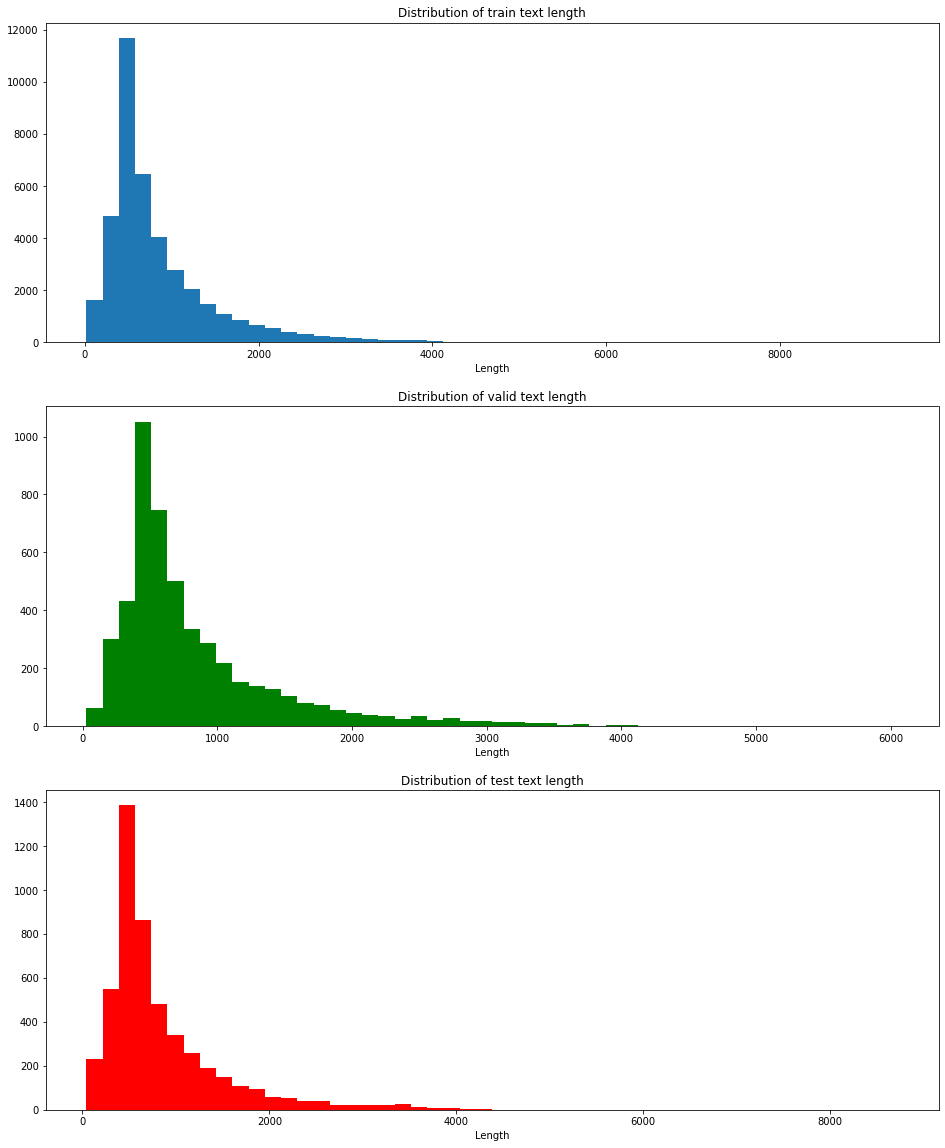

In [ ]:
plt.figure(figsize=(16,20))

plt.subplot(3,1,1)
train_len = [len(l) for l in df_train_lemmatized.text]
plt.hist(train_len,bins=50)
plt.title('Distribution of train text length')
plt.xlabel('Length')

plt.subplot(3,1,2)
valid_len = [len(l) for l in df_valid_lemmatized.text]
plt.hist(valid_len,bins=50,color='green')
plt.title('Distribution of valid text length')
plt.xlabel('Length')

plt.subplot(3,1,3)
test_len = [len(l) for l in df_test_lemmatized.text]
plt.hist(test_len,bins=50,color='red')
plt.title('Distribution of test text length')
plt.xlabel('Length')

plt.show()

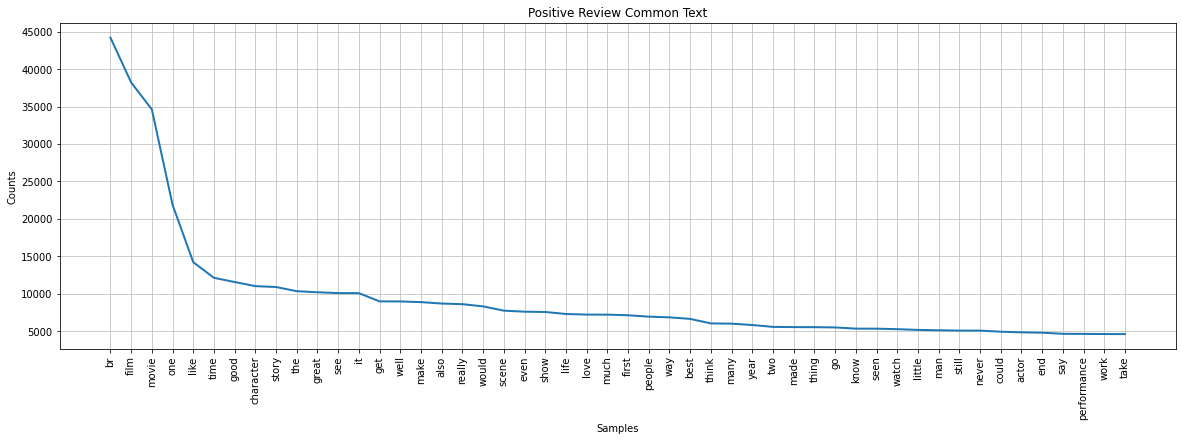

In [ ]:
from nltk.probability import FreqDist #using FreqDist for calculation the frequency of various tokens
pos_freq = FreqDist(' '.join(df_train_lemmatized[df_train_lemmatized['label'] == 1].text).split(' '))
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

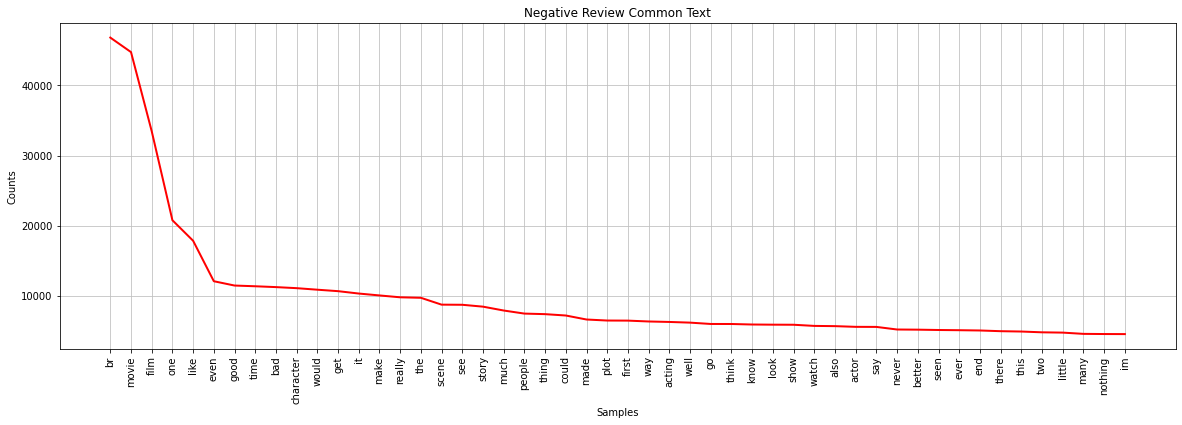

In [ ]:
neg_freq = FreqDist(' '.join(df_train_lemmatized[df_train_lemmatized['label'] == 0].text).split(' '))
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()

In [ ]:
import tensorflow as tf
max_features = 4000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_train_lemmatized['text'].values)
X = tokenizer.texts_to_sequences(df_train_lemmatized['text'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)
print(X.shape)

(40000, 992)


In [ ]:
from collections import Counter
def create_corpus():
    corpus=[]    
    for x in df_train_lemmatized['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
counter=Counter(create_corpus())

<AxesSubplot:>

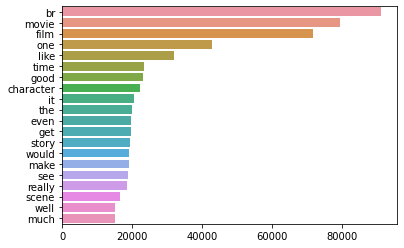

In [ ]:
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:  #most common 20 tokens
    x.append(word)
    y.append(count)
sns.barplot(x=y,y=x)

Inference:
Here we have the visualization of the most common 20 words.

#### Visualizing most common bigrams

<AxesSubplot:>

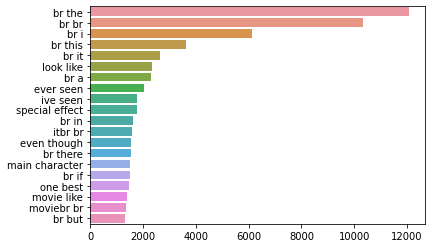

In [ ]:
from collections import defaultdict

def gram_analysis(data,gram):
    tokens=data.split()
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens

#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict


bigram_train=create_dict(df_train_lemmatized.text,2)
counter=Counter(bigram_train)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    x.append(word)
    y.append(count)
sns.barplot(x=y,y=x)


We need to remove most frequent word -"br", since its useless anyway for our analysis. 

In [ ]:
def remove_br(data):
    return data.replace('br','')

df_train_lemmatized['text'] = df_train_lemmatized['text'].apply(remove_br)


In [ ]:
df_train_lemmatized

,text,label
0,grew b 1965 watching loving thunderbird mate s...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change t...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


In [ ]:
from collections import Counter
cnt = Counter()
for text in df_train_lemmatized.text.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('movie', 80734),
 ('film', 72971),
 ('one', 43054),
 ('like', 32160),
 ('time', 24096),
 ('good', 23348),
 ('character', 22266),
 ('it', 22135),
 ('the', 20161),
 ('story', 19737)]

#### 4. Visualize the practical words that represent positive and negative sentiment in the dataset.

In [ ]:
!pip install wordcloud

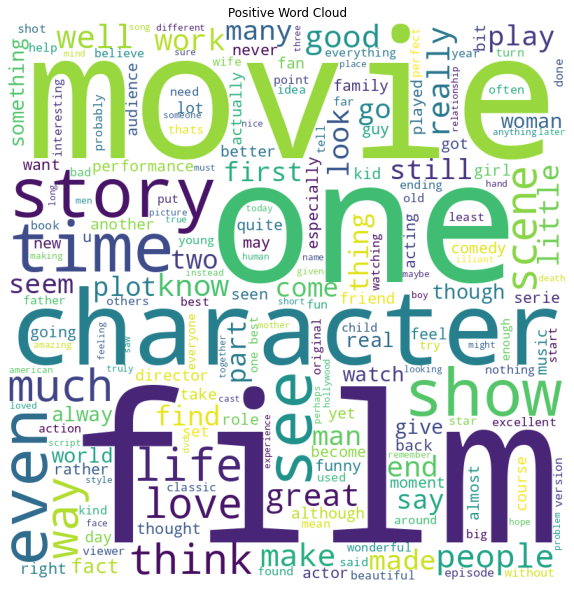

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(df_train_lemmatized[df_train_lemmatized.label==1].text)+" ") 
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Positive Word Cloud')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

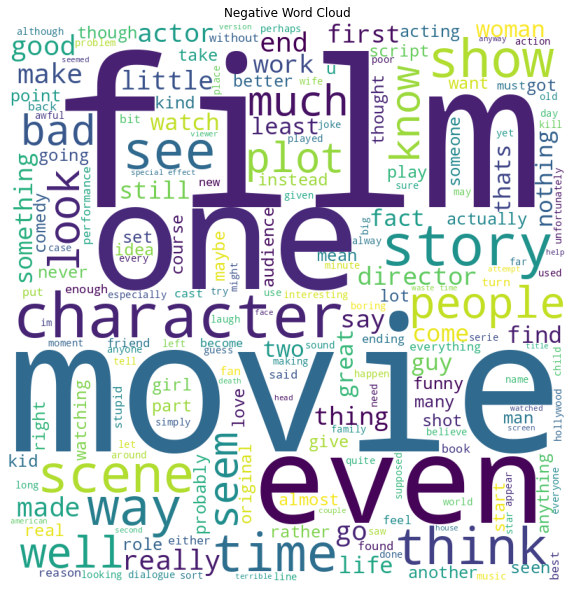

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(df_train_lemmatized[df_train_lemmatized.label==0].text)+" ") 
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Negative Word Cloud')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
X_valid = tokenizer.texts_to_sequences(df_valid_lemmatized.text)
X_valid = tf.keras.preprocessing.sequence.pad_sequences(X_valid, maxlen=963)
X_valid.shape

(5000, 963)

In [ ]:
X_valid

array([[   0,    0,    0, ..., 1559,  910,  531],
       [   0,    0,    0, ...,  156,    2,  697],
       [   0,    0,    0, ..., 2366,  353,    3],
       ...,
       [   0,    0,    0, ...,   51,    3, 1623],
       [   0,    0,    0, ...,   27,   16,   89],
       [   0,    0,    0, ...,  169,  758,  809]], dtype=int32)

In [ ]:
#Creating the LSTM model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 256, input_length=X.shape[1]))
model.add(LSTM(units=50, return_sequences= True, input_shape=(X.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(2, activation = 'softmax',kernel_initializer=init))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 992, 256)          1024000   
_________________________________________________________________
lstm_30 (LSTM)               (None, 992, 50)           61400     
_________________________________________________________________
dropout_30 (Dropout)         (None, 992, 50)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 992, 50)           20200     
_________________________________________________________________
dropout_31 (Dropout)         (None, 992, 50)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 992, 50)           20200     
_________________________________________________________________
dropout_32 (Dropout)         (None, 992, 50)          

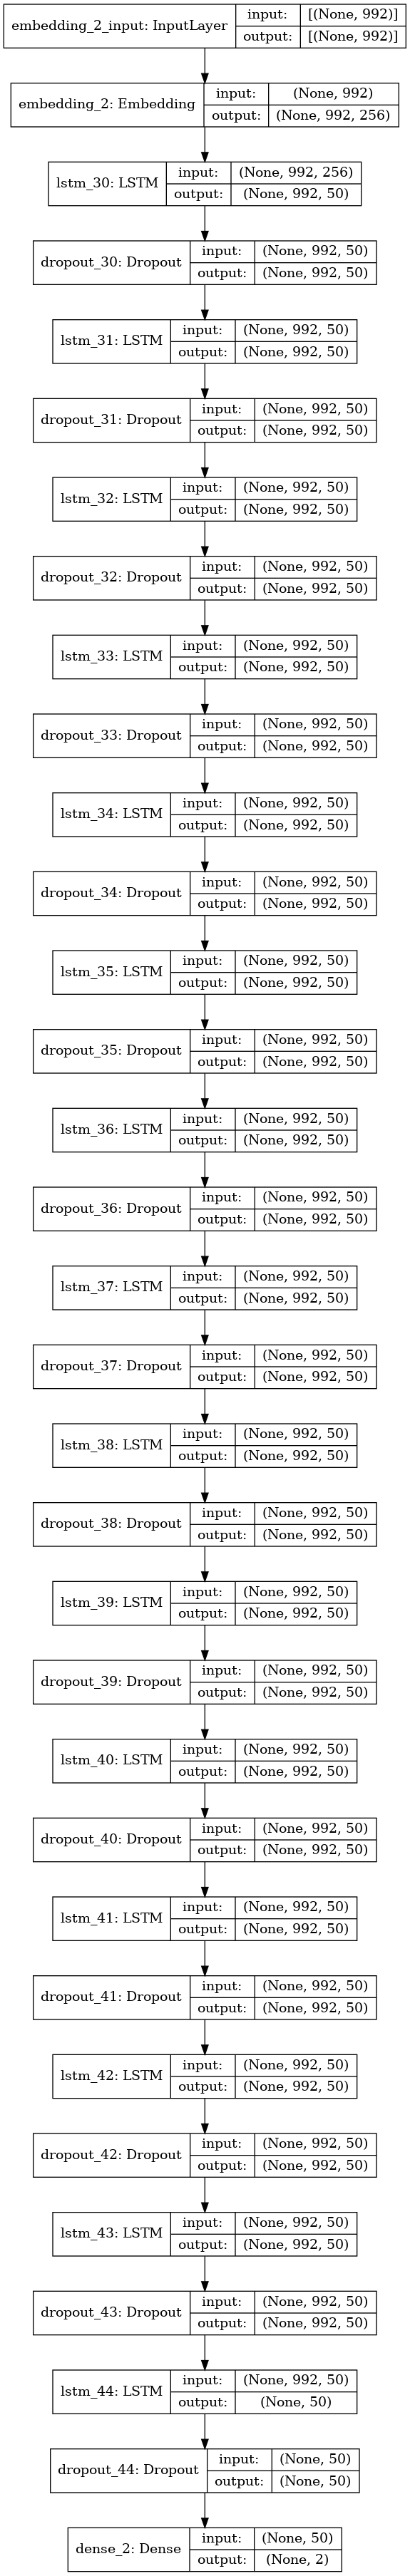

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model.png",show_shapes=True)

In [ ]:
#fitting the model
history_lstm = model.fit(X,df_train_lemmatized.label,batch_size=128, epochs=3, validation_data=(X_valid,df_valid_lemmatized.label))

Epoch 1/3
313/313 [==============================] - 235s 694ms/step - loss: 0.4861 - accuracy: 0.7432 - val_loss: 0.3391 - val_accuracy: 0.8546
Epoch 2/3
313/313 [==============================] - 214s 683ms/step - loss: 0.2987 - accuracy: 0.8795 - val_loss: 0.3157 - val_accuracy: 0.8666
Epoch 3/3
313/313 [==============================] - 214s 685ms/step - loss: 0.2513 - accuracy: 0.9010 - val_loss: 0.3259 - val_accuracy: 0.8696


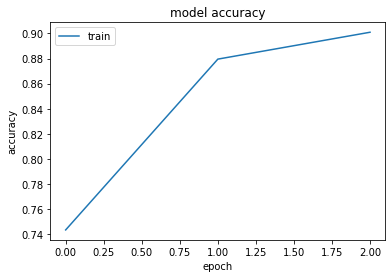

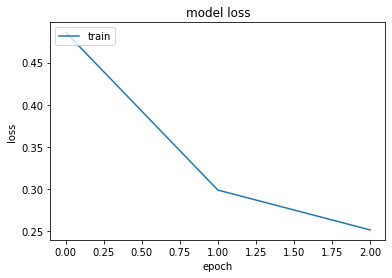

In [ ]:
#visualizing the model
plt.plot(history_lstm.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history_lstm.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
x_test = tokenizer.texts_to_sequences(df_test_lemmatized['text'].values)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=963)
print(x_test.shape)

(5000, 963)


In [ ]:
x_test

array([[   0,    0,    0, ...,  187,  109,  167],
       [   0,    0,    0, ...,   16,  464,  542],
       [   0,    0,    0, ...,    2,  740,  214],
       ...,
       [   0,    0,    0, ...,  196,  315,  922],
       [   0,    0,    0, ...,  768,  768,  768],
       [   0,    0,    0, ...,   18,  704, 2327]], dtype=int32)

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, df_test_lemmatized.label, batch_size=128)
print("test loss, test acc:", results)
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
40/40 [==============================] - 12s 295ms/step - loss: 0.3151 - accuracy: 0.8774
test loss, test acc: [0.3150840103626251, 0.8773999810218811]
Generate predictions for 3 samples
predictions shape: (3, 2)


Inference:
The result of performance measures came out to be very good for all the training, validation and testing datasets.

## Model 2

### BiDRNN

In [ ]:
#Creating the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional,GlobalMaxPooling1D
from keras.layers import Embedding

model1 = Sequential()
model1.add(Embedding(input_dim = max_features, output_dim = 128, input_length=X.shape[1]))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences = True)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(2, activation = 'softmax'))
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 992, 128)          512000    
_________________________________________________________________
bidirectional_56 (Bidirectio (None, 992, 40)           23840     
_________________________________________________________________
bidirectional_57 (Bidirectio (None, 992, 40)           9760      
_________________________________________________________________
bidirectional_58 (Bidirectio (None, 992, 40)           9760      
_________________________________________________________________
bidirectional_59 (Bidirectio (None, 992, 40)           9760      
_________________________________________________________________
bidirectional_60 (Bidirectio (None, 992, 40)           9760      
_________________________________________________________________
bidirectional_61 (Bidirectio (None, 992, 40)          

In [ ]:
#fitting the model
history_bidrnnn  = model1.fit(X,df_train_lemmatized.label,validation_data=(X_valid,df_valid_lemmatized.label),batch_size=128,epochs=3,verbose = 1)

Epoch 1/3
313/313 [==============================] - 509s 1s/step - loss: 0.5809 - accuracy: 0.6784 - val_loss: 0.4623 - val_accuracy: 0.7960
Epoch 2/3
313/313 [==============================] - 461s 1s/step - loss: 0.3886 - accuracy: 0.8330 - val_loss: 0.3674 - val_accuracy: 0.8452
Epoch 3/3
313/313 [==============================] - 462s 1s/step - loss: 0.3333 - accuracy: 0.8658 - val_loss: 0.3425 - val_accuracy: 0.8610


In [ ]:
print("Evaluate on test data")
results = model1.evaluate(x_test, df_test_lemmatized.label, batch_size=128)
print("test loss, test acc:", results)
print("Generate predictions for 3 samples")
predictions = model1.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
40/40 [==============================] - 26s 643ms/step - loss: 0.3363 - accuracy: 0.8646
test loss, test acc: [0.3363145887851715, 0.8646000027656555]
Generate predictions for 3 samples
predictions shape: (3, 2)


Inference:
Although we are getting a decent accuracy from the model.But the model is very complex and simpler model could have given similiar results.